# Question 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [3]:
## Checking for NAs. Getting data types
print(data.isnull().sum())
print(data.dtypes)
data.shape[0]

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64
order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object


5000

In [4]:
data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981
8,9,64,914,266,2,debit,2017-03-17 20:56:50.468
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.343


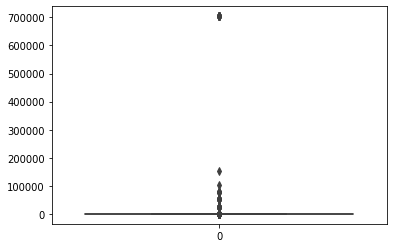

In [5]:
## Boxplot of data
sns.boxplot(data=data['order_amount'])


In [6]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The AOV value is indeeed $3145.13. One of the most important pieces of information here is the standard deviation. A value of 41282.5 implies that the data is very spread out around the mean.
There is also a huge gap between the maximum value and the 3rd quantile. This further demonstrates the spread of the data.

In [7]:
## Looking at outliers above 3rd quantile
q1 = data['order_amount'].quantile(0.25)
q3 = data['order_amount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
data_outlier = data.loc[(data['order_amount'] > fence_high)]

In [8]:
data_outlier.groupby(['order_amount'])['order_amount'].count().reset_index(name='Count').sort_values(by ='order_amount', ascending =False)

,order_amount,Count
41,704000,17
40,154350,1
39,102900,1
38,77175,9
37,51450,16
36,25725,19
35,1760,1
34,1408,2
33,1086,1
32,1064,1


a) There is a high number of outliers with values such as 704000 occurring 17 times in our data. The presence of large outliers impacts the Average Order Value, and skews it towards a larger number. The metric is no longer a good representative of the data.

b) & c) For a more robust metric that is not influenced by outliers, we could look at the median, which has a value of $284 (the 2nd quantile in df.describe()).This is a more reasonable value. 

# Question 2

For (a), we need the ShipperID column to link the Orders Table where the  Order information is stored and the Shippers table where the ShipperName is stored. We then select rows that only have Speedy Express as Shipper and count the number of rows to find the number of orders.

In [ ]:
# SELECT COUNT(*) 
# FROM Orders
# JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID
# where ShipperName = "Speedy Express";

# Answer = 54

In [ ]:
# SELECT [Employees].LastName , COUNT(*) as OrderCount
# FROM [Orders]
# JOIN [Employees] ON
# [Employees].EmployeeID = [Orders].EmployeeID
# GROUP BY [Employees].LastName
# Order BY OrderCount DESC
# LIMIT 1

# Answer = 40

For (c), we need to inner join the Products, Orders, OrderDetails and Customers table to link the Customer Country and the ProductName information. We then group by the ProductName and then sum up the quantities ordered associated to each product. 

In [ ]:
# SELECT ProductName, SUM(Quantity)
# From [Products]
# JOIN [OrderDetails] 
# ON [Products].ProductID = [OrderDetails].ProductID
# JOIN [Orders]
# ON [OrderDetails].OrderID = [Orders].OrderID
# JOIN [Customers]
# ON [Customers].CustomerID = [Orders].CustomerID
# where Customers.Country = 'Germany'
# GROUP BY Products.ProductName
# ORDER BY SUM(Quantity) DESC
# LIMIT 1
# ;
# Answer = Boston Crab Meat , Order Quantity = 160